In [194]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

df = pd.read_csv('./data.csv') # Removed few outlier points
df = df.fillna(-1)
dfnew = pd.read_csv('./new.csv')
getColumn = lambda col: list(filter(lambda n: n != -1, df[col].values))

In [136]:
# Discharge columns
dt1 = getColumn("discharge1_t")
di1 = getColumn("discharge1_c")
dv1 = getColumn("discharge1_v")

dt2 = getColumn("discharge2_t")
di2 = getColumn("discharge2_c")
dv2 = getColumn("discharge2_v")

dt3 = getColumn("discharge3_t")
di3 = getColumn("discharge3_c")
dv3 = getColumn("discharge3_v")

dt4 = getColumn("discharge4_t")
di4 = getColumn("discharge4_c")
dv4 = getColumn("discharge4_v")

dt5 = getColumn("discharge5_t")
di5 = getColumn("discharge5_c")
dv5 = getColumn("discharge5_v")

# Charge columns
ct1 = getColumn("charge1_t")
ci1 = getColumn("charge1_c")
cv1 = getColumn("charge1_v")

ct2 = getColumn("charge2_t")
ci2 = getColumn("charge2_c")
cv2 = getColumn("charge2_v")

ct3 = getColumn("charge3_t")
ci3 = getColumn("charge3_c")
cv3 = getColumn("charge3_v")

ct4 = getColumn("charge4_t")
ci4 = getColumn("charge4_c")
cv4 = getColumn("charge4_v")

ct5 = getColumn("charge5_t")
ci5 = getColumn("charge5_c")
cv5 = getColumn("charge5_v")

dts = [dt1, dt2, dt3, dt4, dt5]
dvs = [dv1, dv2, dv3, dv4, dv5]
dis = [di1, di2, di3, di4, di5]
cts = [ct1, ct2, ct3, ct4, ct5]
cvs = [cv1, cv2, cv3, cv4, cv5]
cis = [ci1, ci2, ci3, ci4, ci5]

In [137]:
irs = []

for j in range(5):
    irs.append(cvs[j][-1] / cis[j][-1])

IR = np.mean(irs)
print("IR = ", IR)

IR =  4.267221419150299


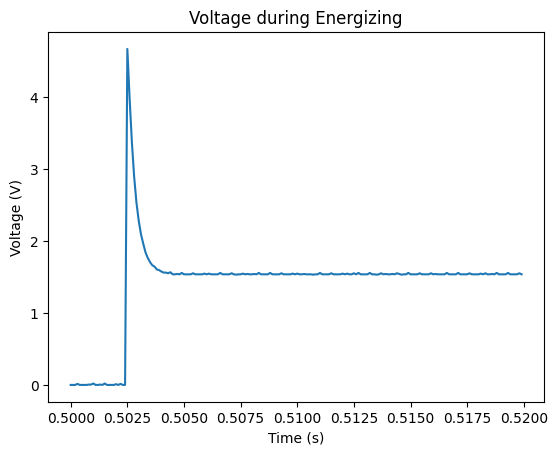

In [138]:
plt.plot(cts[0][5000:5200], cvs[0][5000:5200])
plt.title("Voltage during Energizing")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

In [139]:
# Discharge columns
dt1 = getColumn("discharge1_t")[2756:2769]
di1 = getColumn("discharge1_c")[2756:2769]
dv1 = getColumn("discharge1_v")[2756:2769]

dt2 = getColumn("discharge2_t")[4810:4822]
di2 = getColumn("discharge2_c")[4810:4822]
dv2 = getColumn("discharge2_v")[4810:4822]

dt3 = getColumn("discharge3_t")[888:900]
di3 = getColumn("discharge3_c")[888:900]
dv3 = getColumn("discharge3_v")[888:900]

dt4 = getColumn("discharge4_t")[2613:2626]
di4 = getColumn("discharge4_c")[2613:2626]
dv4 = getColumn("discharge4_v")[2613:2626]

dt5 = getColumn("discharge5_t")[2835:2847]
di5 = getColumn("discharge5_c")[2835:2847]
dv5 = getColumn("discharge5_v")[2835:2847]

# Charge columns
ct1 = getColumn("charge1_t")[5027:5040]
ci1 = getColumn("charge1_c")[5027:5040]
cv1 = getColumn("charge1_v")[5027:5040]

ct2 = getColumn("charge2_t")[1759:1771]
ci2 = getColumn("charge2_c")[1759:1771]
cv2 = getColumn("charge2_v")[1759:1771]

ct3 = getColumn("charge3_t")[2702:2714]
ci3 = getColumn("charge3_c")[2702:2714]
cv3 = getColumn("charge3_v")[2702:2714]

ct4 = getColumn("charge4_t")[2948:2961]
ci4 = getColumn("charge4_c")[2948:2961]
cv4 = getColumn("charge4_v")[2948:2961]

ct5 = getColumn("charge5_t")[4853:4865]
ci5 = getColumn("charge5_c")[4853:4865]
cv5 = getColumn("charge5_v")[4853:4865]

dts = [dt1, dt2, dt3, dt4, dt5]
dvs = [dv1, dv2, dv3, dv4, dv5]
dis = [di1, di2, di3, di4, di5]
cts = [ct1, ct2, ct3, ct4, ct5]
cvs = [cv1, cv2, cv3, cv4, cv5]
cis = [ci1, ci2, ci3, ci4, ci5]

4.6494078850556996e-05
[0.00511819 0.00493629 0.00498435 0.00498021 0.00482918]


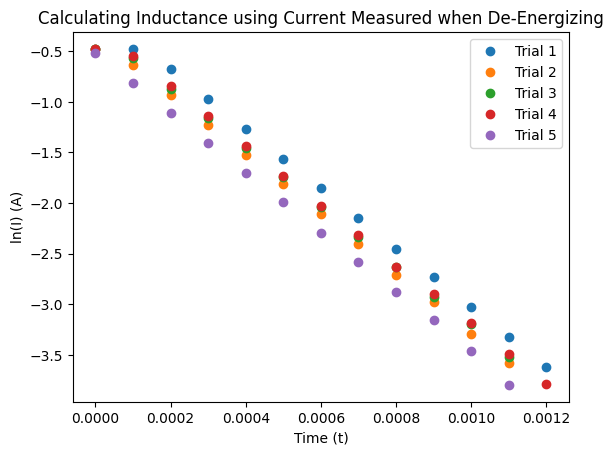

In [264]:
ds1 = pd.read_csv('./data.csv')

# DISCHARGE USING CURRENT 
d1 = np.polyfit(dt1, np.log(di1), 1)[0]
d2 = np.polyfit(dt2, np.log(di2), 1)[0]
d3 = np.polyfit(dt3, np.log(di3), 1)[0]
d4 = np.polyfit(dt4, np.log(di4), 1)[0]
d5 = np.polyfit(dt5, np.log(di5), 1)[0]

discharge = - 14.27 / np.array([d1, d2, d3, d4, d5])
se_d = np.std(discharge, ddof = 1) / np.sqrt(len(discharge))
print(se_d)
print(discharge)

plt.plot(dt1 - dt1[0], np.log(di1), 'o', label = 'Trial 1')
plt.plot(dt2 - dt2[0], np.log(di2), 'o', label = 'Trial 2')
plt.plot(dt3 - dt3[0], np.log(di3), 'o', label = 'Trial 3')
plt.plot(dt4 - dt4[0], np.log(di4), 'o', label = 'Trial 4')
plt.plot(dt5 - dt5[0], np.log(di5), 'o', label = 'Trial 5')
plt.legend()
plt.xlabel('Time (t)')
plt.ylabel(r'ln(I) (A)')
plt.title('Calculating Inductance using Current Measured when De-Energizing')
plt.legend()


8.431876367195245e-05
[0.0051481  0.00481951 0.00515501 0.00479728 0.00515377]


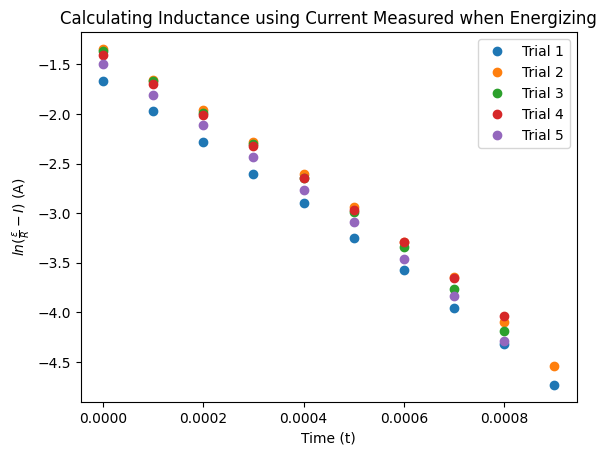

In [255]:
# CHARGE USING CURRENT
#( (ln(I) - ln(I0) ) / I0 ) / t = R / L
c1 = np.polyfit(ct1[:-1], np.log((ci1[-1]-ci1[:-1])), 1)[0]
c2 = np.polyfit(ct2[:-1], np.log((ci2[-1]-ci2[:-1])), 1)[0]
c3 = np.polyfit(ct3[:-1], np.log((ci3[-1]-ci3[:-1])), 1)[0]
c4 = np.polyfit(ct4[:-1], np.log((ci4[-1]-ci4[:-1])), 1)[0]
c5 = np.polyfit(ct5[:-1], np.log((ci5[-1]-ci5[:-1])), 1)[0]
charge = - 19.3 / np.array([c1, c2, c3, c4, c5])
se_c = np.std(charge, ddof = 1) / np.sqrt(len(charge))
print(se_c)
print(charge)

# plt.plot(ct5[:-1], np.log((ci5[-1]-ci5[:-1])/ci5[-1]), 'o')
plt.plot(ct1[:-3] - ct1[0], np.log((ci1[-1]-ci1[:-3])), 'o', label = 'Trial 1')
plt.plot(ct4[:-3] - ct4[0], np.log((ci4[-1]-ci4[:-3])), 'o', label = 'Trial 2')
plt.plot(ct2[:-3] - ct2[0], np.log((ci2[-1]-ci2[:-3])), 'o', label = 'Trial 3')
plt.plot(ct3[:-3] - ct3[0], np.log((ci3[-1]-ci3[:-3])), 'o', label = 'Trial 4')
plt.plot(ct5[:-3] - ct5[0], np.log((ci5[-1]-ci5[:-3])), 'o', label = 'Trial 5')
plt.xlabel('Time (t)')
plt.ylabel(r'$ln(\frac{\varepsilon}{R} - I)$ (A)')
plt.title('Calculating Inductance using Current Measured when Energizing')
plt.legend()



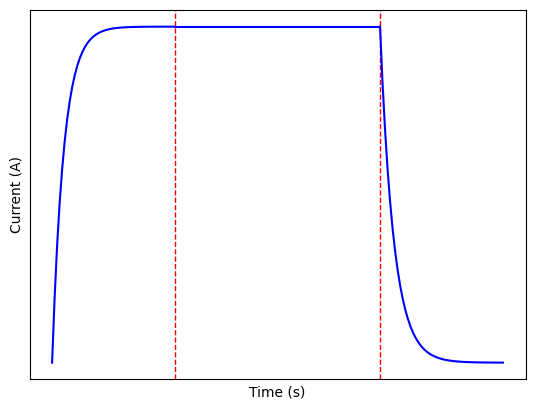

In [192]:
x1 = np.linspace(0, 0.3, 50)
y1 = 1 - np.e **(-35*x1)
x2 = np.linspace(0.3, 0.8, 50)
y2 = np.full(50, 1)
x3 = np.linspace(0.8, 1.1)
y3 = np.e ** (-30*x1)
plt.plot(x1, y1, color='blue')
plt.axvline(x=0.3, color = 'r', linestyle='--', linewidth=1)
plt.plot(x2, y2, color = 'blue')
plt.axvline(x=0.8, color = 'r', linestyle='--', linewidth=1)
plt.plot(x3, y3, color = 'blue')
plt.xticks([])
plt.yticks([])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.savefig('./currentdemo')

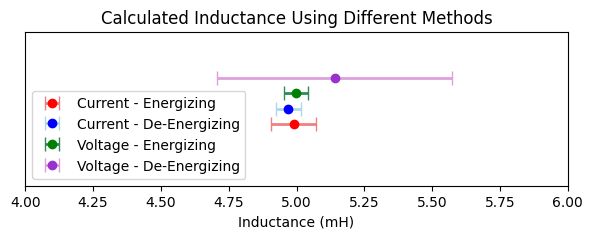

In [268]:


plt.figure(figsize=(7, 2))
# Plot the point with horizontal error bars
plt.errorbar(
    x= 4.989,
    y=-0.1,
    xerr= 0.083,
    fmt='o',          # Format the point as a circle marker
    color='red',    # Color of the data point
    ecolor='lightcoral',    # Color of the error bars
    elinewidth=2,     # Thickness of the error bar lines
    capsize=5,        # Add caps to the error bars
    label = 'Current - Energizing'
)
plt.errorbar(
    x=4.970,
    y=0,
    xerr=0.046,
    fmt='o',          # Format the point as a circle marker
    color='blue',    # Color of the data point
    ecolor='lightblue',    # Color of the error bars
    elinewidth=2,     # Thickness of the error bar lines
    capsize=5,        # Add caps to the error bars
    label = 'Current - De-Energizing'
)
plt.errorbar(
    x=4.997,
    y=0.1,
    xerr=0.044,
    fmt='o',          # Format the point as a circle marker
    color='green',    # Color of the data point
    ecolor='seagreen',    # Color of the error bars
    elinewidth=2,     # Thickness of the error bar lines
    capsize=5,        # Add caps to the error bars
    label = 'Voltage - Energizing'
)
plt.errorbar(
    x=5.141,
    y=0.2,
    xerr=0.433,
    fmt='o',          # Format the point as a circle marker
    color='darkorchid',    # Color of the data point
    ecolor='plum',    # Color of the error bars
    elinewidth=2,     # Thickness of the error bar lines
    capsize=5,        # Add caps to the error bars
    label = 'Voltage - De-Energizing'
)

# Optional: Adjust the plot to look like a number line
plt.yticks([]) # Hide the y-axis ticks
plt.ylim(-0.5, 0.5) # Set a fixed range for the y-axis to keep the point centered
plt.xlim(4, 6) # Set appropriate limits for the x-axis
plt.xlabel("Inductance (mH)") # Label the x-axis
plt.legend()
plt.title("Calculated Inductance Using Different Methods")

# Display the plot
plt.show()


0.00514107320733914 0.00043273407732045385
0.004996885695202363 4.4243648358577096e-05
0.005068979451270751


/var/folders/g6/t2m0rznn3h326jx3qv9b8lxm0000gq/T/ipykernel_75399/3946302110.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


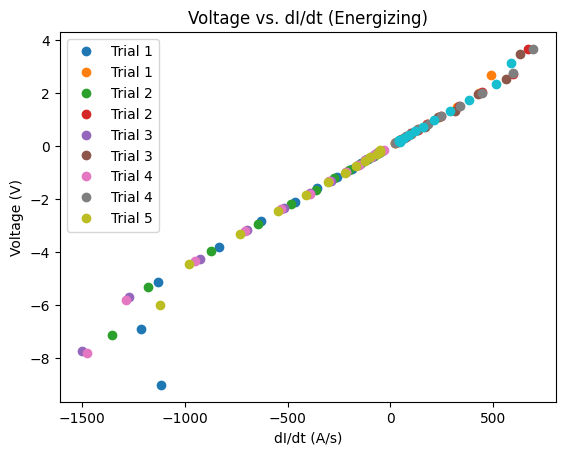

In [141]:
def getInductance(t, i, v, ind):
    v_ = v.copy()
    dIdt = np.gradient(i, t[1] - t[0])
    for j in range(len(v)):
        v_[j] -= IR * i[j]
    z = np.polyfit(dIdt, v_, 1)
    plt.title("Voltage vs. dI/dt (Energizing)")
    plt.xlabel("dI/dt (A/s)")
    plt.ylabel("Voltage (V)")
    plt.legend()
    plt.plot(dIdt, v_, 'o', label=f"Trial {ind + 1}")
    return z[0]

ic = []
id = []

# plt.show()

for i in range(5):
    id.append(getInductance(dts[i], dis[i], dvs[i], i))
    ic.append(getInductance(cts[i], cis[i], cvs[i], i))

print(np.mean(id), np.std(id))
print(np.mean(ic), np.std(ic))
print((np.mean(id) + np.mean(ic)) / 2)